In [1]:
import GeoPredictors

In [2]:
from GeoPredictors import predictor as pm

In [3]:
df = pm.load_and_preprocess_data()

In [4]:
# Example usage:
X_train, X_val, X_test, y_train, y_val, y_test = pm.split_data(df)
model = pm.train(X_train, y_train)
y_pred, r2 = pm.predict(model, X_test, y_test)

In [5]:
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('stacked',
                 StackingRegressor(estimators=[('rf',
                                                RandomForestRegressor(max_depth=10,
                                                                      n_estimators=200,
                                                                      random_state=42)),
                                               ('xgb',
                                                XGBRegressor(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             device=None,
                                                             early_stopping_rounds=None,
                                                             enable_categorical=...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=6,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...))],
                                   final_estimator=LinearRegression()))])

In [6]:
print(r2)

0.6247680462688858


In [24]:
y_pred_val, r2_val = pm.predict(model, X_val, y_val)
print(r2_val)

0.541946849216013


In [25]:
Permeability_Data= X_test.copy()

Permeability_Data['Predicted_PERMEABILITY'] = y_pred

print(Permeability_Data[['DEPTH', 'Predicted_PERMEABILITY']])  

       DEPTH  Predicted_PERMEABILITY
90   2197.48              230.372511
240  2201.12               55.430847
168  2666.95              308.080439
222  2196.50              495.304309
247  2686.70              238.934555
..       ...                     ...
6    2401.30              495.848646
104  2426.05              500.224750
18   2004.50              884.649388
98   2165.46              999.293353
218  2195.44             1074.161402

[262 rows x 2 columns]


In [8]:
from GeoPredictors import visualizer as vis

In [9]:
vis.handle_data()

Dropdown(description='Select Well:', index=5, options=('204_19_3A', '204_19_6', '204_19_7', '204_20_1', '204_2…

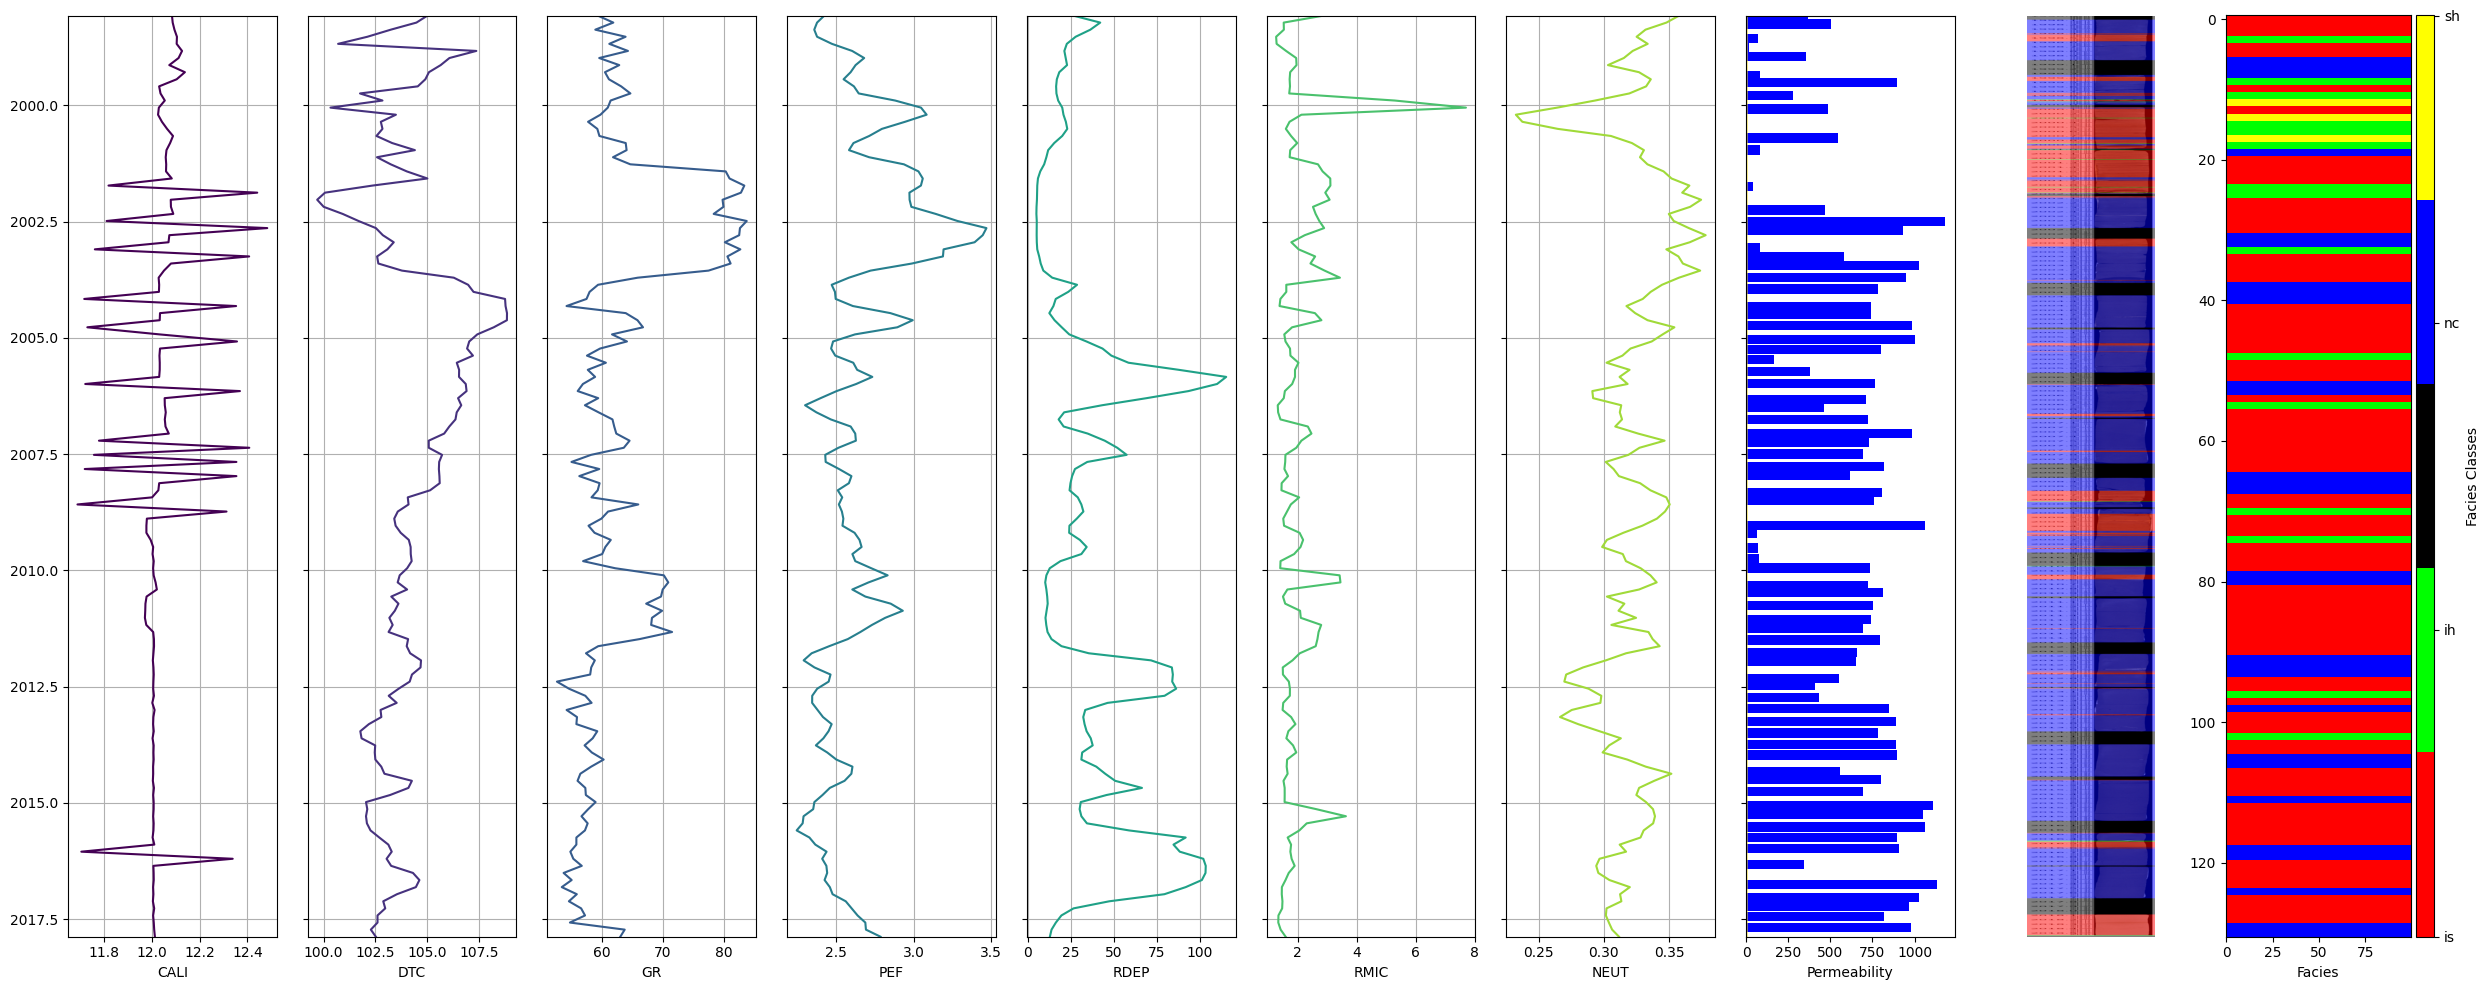

In [10]:
vis.visualize()

In [ ]:
vis.predict_visualize(log, Permeability, original_image, predicted_image)